<a href="https://colab.research.google.com/github/Reyqq/learning/blob/main/%D0%91%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3%D0%B8/lightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Что такое LightGBM?

**LightGBM(Light Gradient Boosting Machine)** — Используется для задач классификации, регрессии и ранжирования, и основана на технике градиентного бустинга. LightGBM известна своей высокой скоростью и эффективностью, что делает её популярным выбором среди разработчиков и исследователей.

# Зачем нужен LightGBM?

**LightGBM** необходим для решения сложных задач машинного обучения, где требуются высокая точность и производительность. Основные преимущества **LightGBM** включает:
1. **Высокая скорость обучения:** LightGBM обучается быстрее по сравнению с другими библиотеками градиентного бустинга.

2. **Низкое потребление памяти:** LightGBM эффективно использует память, что позволяет работать с большими наборами данных.

3. **Обработка категориальных признаков:** LightGBM может автоматически обрабатывать категориальные признаки, что упрощает предобработку данных.


# Плюсы и минусы LightGBM

**Плюсы:**
- **Высокая скорость и производительность:** LightGBM обучается быстрее и требует меньше памяти.

- **Автоматическая обработка категориальных признаков:** Упрощает предобработку данных.

- **Масштабируемость:** Поддержка распределенных вычислений и параллельного обучения.

- **Низкое потребление памяти:** LightGBM эффективно использует память, что позволяет работать с большими наборами данных.

**Минусы:**
  - **Чувствительность к гиперпараметрам:** Требуется тщательная настройка гиперпараметров для достижения оптимальной производительности.

  - **Сложность в настройке:** Для достижения лучших результатов может потребоваться значительное количество времени и усилий для настройки.

  - **Потенциальные проблемы с переобучением:** При неправильной настройке гиперпараметров модель может переобучиться на тренировочных данных.


**Основные компоненты и особенности работы **LightGBM** включают:**
1. Использование **Leaf-wise** роста деревьев: LightGBM использует стратегию роста деревьев по листьям, что позволяет быстрее находить оптимальные разбиения.

2. **GOSS(Gradient-based One-Side Sampling)** - Переводится как односторонний отбор на основе градиентов. В чём **фишка:** у вас есть некоторые наблюдения, в которых градиент большой. Обычно таргет на них хуже предсказывается (т.е. больший потенциал для улучшения качества модели), чем на наблюдениях, где градиент маленький.  Хотелось бы, обучаясь, обратить большее внимание на эти наблюдения, чем на наблюдения с маленьким градиентом.

3. **Feature Bundling:** LightGBM объединяет малозначимые признаки в один, что позволяет сократить размер модели и улучшить производительность.

4. **Алгоритм градиентного бустинга.**

5. **Управление дискретными признаками.**

6. **Гистограммный алгоритм.**


**Более подробно о приемах.**
- Использование Leaf-wise роста деревьев:
  - Одним из ключевых отличий LightGBM от других реализаций градиентного бустинга является использование стратегии роста деревьев по листьям (leaf-wise growth).

  - В традиционном методе роста деревьев, таком как уровень-уровень (level-wise growth), каждое дерево строится путем разделения узлов на каждом уровне до тех пор, пока не достигнут максимальный уровень дерева.

  - В Leaf-wise росте, каждое дерево строится путем поиска и разделения наиболее важного листа (листа с наибольшим числом ошибок) на каждом шаге. Это приводит к более глубоким и асимметричным деревьям, что позволяет лучше справляться со сложными зависимостями в данных.

**Преимущества leaf-wise роста:**
 1. **Более точные модели:** Leaf-wise рост позволяет лучше захватывать сложные паттерны в данных.

 2. **Эффективность:** LightGBM использует эффективные методы поиска и сортировки, что снижает вычислительные затраты.

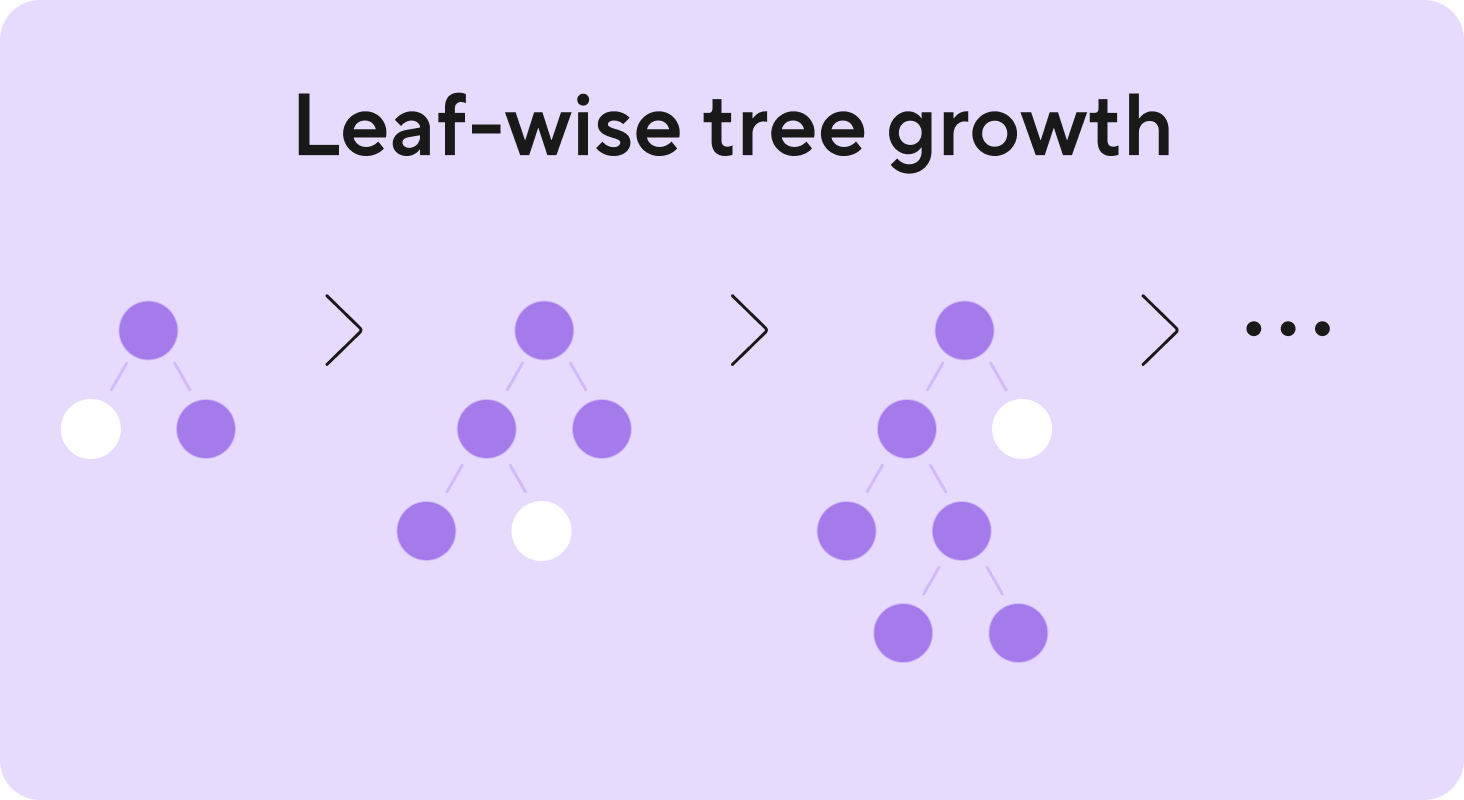

# Что такое GOSS?

**Gradient-based One-Side Sampling (GOSS)** — это техника, используемая в LightGBM для улучшения эффективности обучения моделей градиентного бустинга. Этот метод уменьшает количество данных, используемых при обучении, путем отбора наиболее важных наблюдений на основе величины их градиентов.

# Зачем нужен GOSS?

**GOSS** необходим для ускорения процесса обучения и уменьшения потребления памяти, особенно при работе с большими данными. Он позволяет моделям LightGBM фокусироваться на наиболее значимых примерах, что улучшает точность и производительность.

# Как работает GOSS?

**Основная идея GOSS заключается в следующем:**

- **Вычисление градиентов:** Для всех обучающих примеров вычисляются градиенты ошибки.

- **Отбор важных примеров:** Примеры с наибольшими градиентами выбираются полностью, поскольку они наиболее значимы для обновления модели.

- **Случайная выборка из остальных примеров:** Из оставшихся примеров (с меньшими градиентами) случайным образом выбирается подмножество, чтобы уменьшить общий объем данных для обучения.

- **Корректировка весов:** Чтобы сбалансировать влияние на модель, веса выбранных примеров корректируются.

**Работает это всё следующим образом.**

Вы берёте наблюдение с большим градиентом, выбираете какую-то долю (для примера я назвал \\( a\\) таких наблюдений). Теперь у вас есть все оставшиеся наблюдения. Из неё вы делаете подвыборку, и берёте какую-то долю \\( b\\) из оставшихся $ 1 - a $ наблюдений. Далее веса для таких наблюдений вы усиливаете множителем $ (1 - a) / b $. Это сделано для того, чтобы не перекособочить реальное распределение данных.


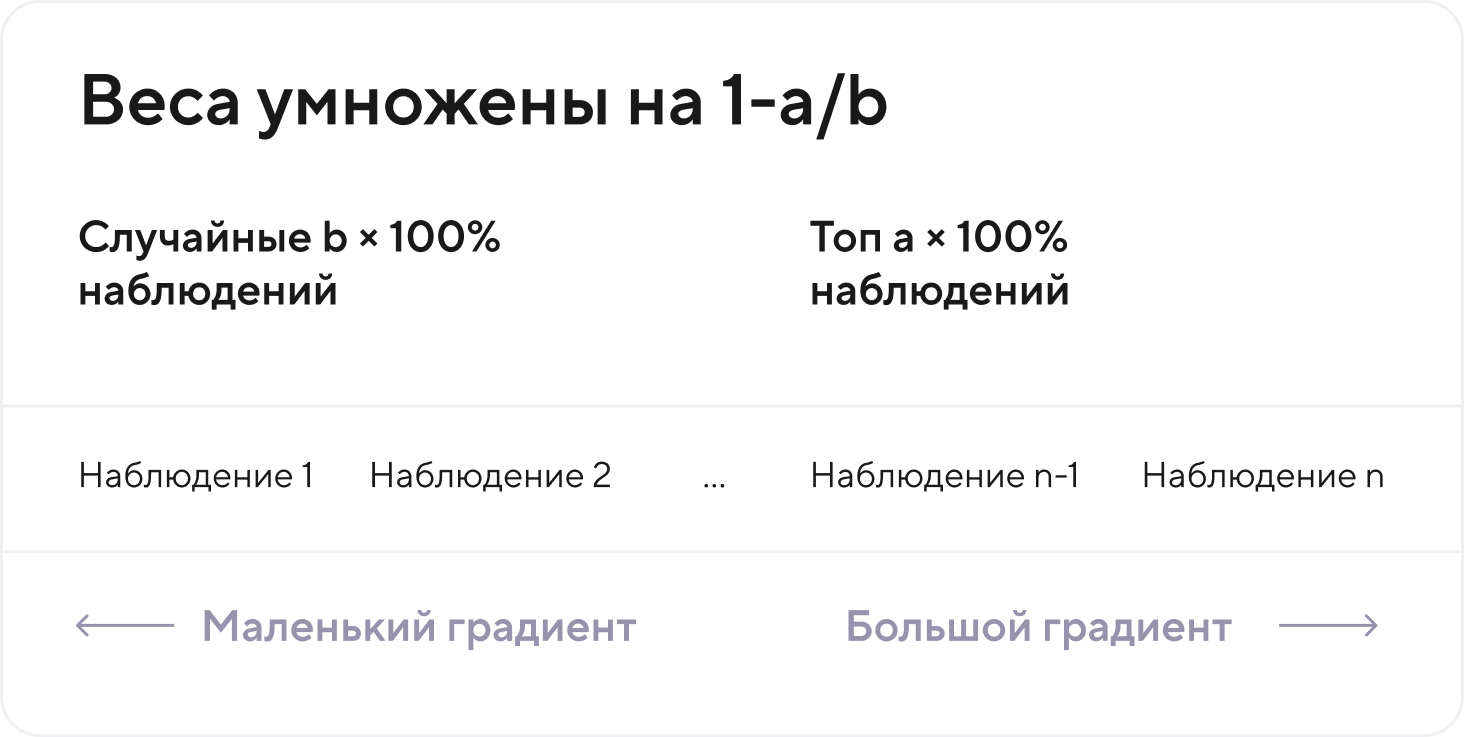

В итоге мы получаем значительный буст скорости. Мы обрабатываем не все наблюдения, а имеем дело с небольшой частью, и при этом уделяем особое внимание тем наблюдениям, где градиенты самые большие.

**Преимущества и недостатки GOSS:**

**Преимущества:**
- **Ускорение обучения:** Значительное сокращение объема данных для обучения позволяет ускорить процесс.

- **Эффективное использование ресурсов:** Уменьшение памяти и вычислительных ресурсов.

- **Фокус на значимых примерах:** Улучшение точности модели за счет внимания к важным примерам.

**Недостатки:**
- **Потенциальная потеря информации:** Исключение некоторых примеров может привести к потере важной информации, особенно если они представляют уникальные паттерны.

- **Чувствительность к параметрам:** Требуется тщательная настройка параметров \\( a\\) и \\( b\\) для достижения оптимальных результатов.

# Feature Bundling.

**Feature Bundling** — это метод, используемый для объединения слабозависимых признаков в один, чтобы уменьшить размер модели и улучшить производительность. Этот метод работает следующим образом:

1. Признаки анализируются на предмет **корреляции**.
2. **Слабокоррелированные** признаки объединяются в один новый признак.
3. Модель обучается с использованием этих новых признаков.

**Преимущества Feature Bundling:**
 - **Снижение потребления памяти:** Объединение признаков уменьшает размер данных.
 - **Повышение производительности:** Меньшее число признаков уменьшает вычислительную сложность и ускоряет обучение.

# Алгоритм градиентного бустинга

**Градиентный бустинг** — это метод ансамблевого обучения, который строит модель в виде ансамбля слабых моделей (обычно деревьев решений), где каждая новая модель пытается скорректировать ошибки предыдущих моделей. Основные шаги градиентного бустинга:

- Инициализация модели.
- Обучение новой модели для предсказания ошибки (остатка) текущей модели.
- Обновление текущей модели с учетом новой модели.
- Повторение процесса до тех пор, пока не достигнута заданная точность или количество итераций.


#  Управление дискретными признаками

**LightGBM** автоматически обрабатывает категориальные признаки, что упрощает предобработку данных и улучшает производительность модели. Это достигается путем использования специальных методов, таких как target encoding или специальное разбиение категориальных признаков.

# Гистограммный алгоритм

Для ускорения поиска оптимальных разбиений, LightGBM использует гистограммы. Вместо того чтобы искать разбиения по всем возможным значениям признака, LightGBM сначала дискретизирует значения признаков в небольшое количество интервалов (бинов) и строит гистограммы.

**Преимущества гистограммного алгоритма:**
 - **Снижение времени обучения:** Гистограммы позволяют быстрее находить оптимальные разбиения.
 - **Снижение потребления памяти:** Дискретизация данных уменьшает объем используемой памяти.

#  Как лучше использовать LightGBM?

1. **Тщательная настройка гиперпараметров:** Используйте методы подбора гиперпараметров, такие как сеточный поиск (Grid Search) или байесовская оптимизация, чтобы найти оптимальные значения.

   В LightGBM существует множество параметров, которые можно настроить:
     - **num_leaves:** Максимальное число листьев в одном дереве. Увеличение этого параметра может улучшить точность, но может привести к переобучению.
     - **max_depth:** Максимальная глубина дерева. Ограничение глубины может помочь избежать переобучения.
     - **learning_rate:** Шаг обучения. Низкое значение может привести к более точной модели, но потребует больше итераций.
     - **feature_fraction:** Доля признаков, используемых при каждом сплите. Может помочь избежать переобучения.
     - **bagging_fraction** и **bagging_freq:** Параметры для метода бэггинга, который помогает уменьшить переобучение за счет случайного отбора подмножества данных на каждой итерации.

2. **Кросс-валидация:** Используйте кросс-валидацию для оценки производительности модели и предотвращения переобучения.

3. **Ранняя остановка (Early Stopping):** Применяйте раннюю остановку для прекращения обучения, если производительность на валидационном наборе данных перестает улучшаться.

4. **Использование GPU:** LightGBM поддерживает обучение на GPU, что может значительно ускорить процесс обучения на больших данных.

5. **Мониторинг обучения:** Используйте встроенные функции LightGBM для мониторинга процесса обучения и визуализации метрик.

6. **Обработка категориальных признаков.**
 LightGBM имеет встроенную поддержку категориальных признаков, что упрощает предобработку данных. Просто укажите, какие признаки являются категориальными, и LightGBM автоматически обработает их.

7. **Управление дисбалансом классов.**

   При работе с несбалансированными данными LightGBM предлагает несколько подходов для улучшения производительности:
     - **is_unbalance:** Установка этого параметра в **True** автоматически регулирует веса классов.
     - **scale_pos_weight:** Явное задание весов для положительных классов.
     
8. **Важность признаков (Feature Importance)**

   LightGBM предоставляет возможность оценки важности признаков, что может помочь в интерпретации модели и выборе наиболее значимых признаков.

9. **Управление памятью.**
   При работе с большими данными управление памятью становится критически важным. LightGBM поддерживает режимы обучения, которые минимизируют использование памяти:
     - **use_two_round_loading:** Загружает данные в два этапа, что снижает потребление памяти.
     - **max_bin:** Уменьшение количества бинов может снизить потребление памяти.